In [7]:
from glob import glob

import numpy as np
import pandas as pd

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
us_coin_specifications = pd.DataFrame(
    {"denomination": ['cent', 'nickel', 'dime', 'quarter dollar', 'half dollar', 'dollar'],
     "diameter": [19.05, 21.21, 17.91, 24.26, 30.61, 26.49],
     "thickness": [1.52, 1.95, 1.35, 1.75, 2.15, 2.00]})

In [9]:
nickel_path = "./nickels"
nickel_files = glob(f"{nickel_path}/*")

quarters_path = "./quarters"
quarters_files = glob(f"{quarters_path}/*")

cents_path = "./cents"
cents_files = glob(f"{cents_path}/*")

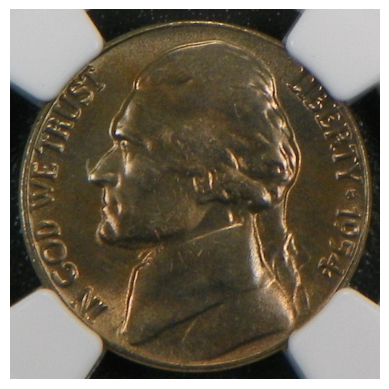

In [10]:
img = Image.open(nickel_files[100])
img = np.asarray(img)
plt.imshow(img)
plt.axis('off');

(-0.5, 895.5, 895.5, -0.5)

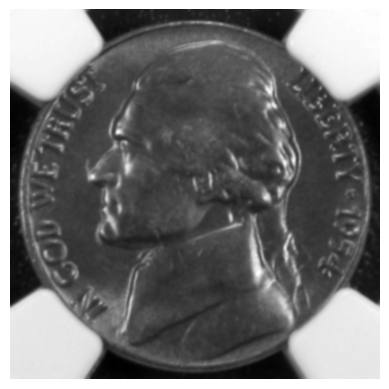

In [11]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray_img, (15, 15), 0)
plt.imshow(blurred, cmap = 'gray')
plt.axis('off')

In [12]:
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp = 1,
    minDist = 50,
    param1 = 50,
    param2 = 30,
    minRadius = 20,
    maxRadius = 300
)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

    # Choose the first circle as the coin (you may need to refine this based on your use case)
    x, y, r = circles[0]

    # Crop the coin using the circle's coordinates and radius
    coin_crop = img[y - r:y + r, x - r:x + r]

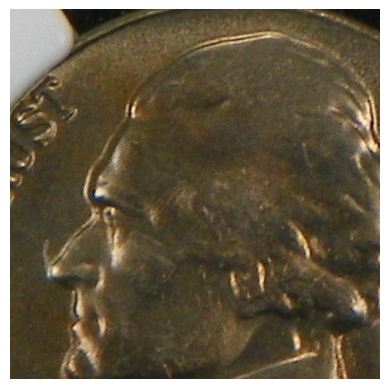

In [13]:
plt.imshow(coin_crop)
plt.axis('off');

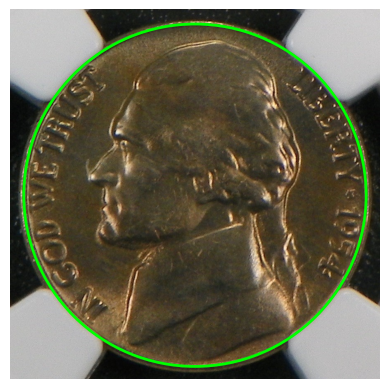

In [15]:
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp = 1,
    minDist = 50,
    param1 = 50,
    param2 = 30,
    minRadius = 20
)

circles = np.round(circles[0, :]).astype("int")
valid_circles = [circle for circle in circles if circle[2] > 30]
best_circle = max(valid_circles, key=lambda x: x[2])

plt.imshow(img)
plt.axis('off');

ax = plt.gca()
x, y, r = best_circle
best_circle_patch = plt.Circle((x, y), r, color='lime', fill=False, linewidth=2)
ax.add_patch(best_circle_patch)

plt.show()

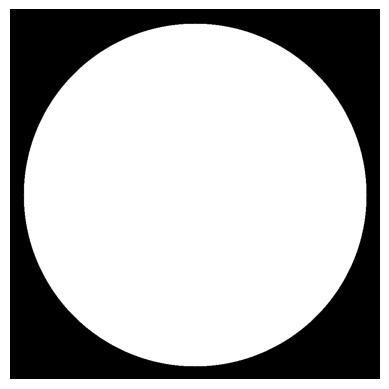

In [16]:
mask = np.zeros_like(img, dtype = 'uint8')
cv2.circle(mask, (x, y), r, (255, 255, 255), -1)
mask_1 = mask[:, :, 0]
plt.imshow(mask_1, cmap = 'gray')
plt.axis('off');

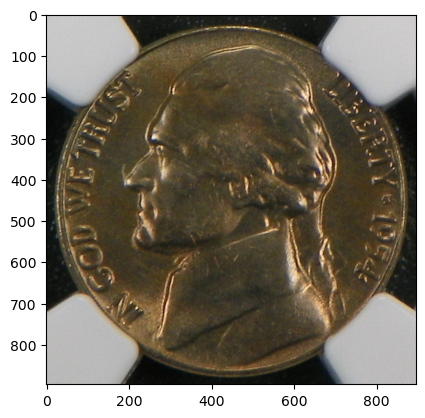

In [10]:
plt.imshow(img)

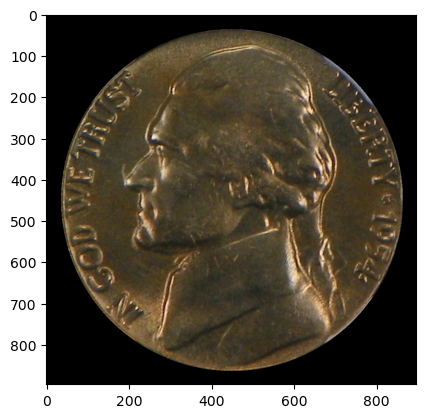

In [11]:
cropped = cv2.bitwise_and(img, img, mask = mask_1)
plt.imshow(cropped)

In [12]:
img_len = len(img.flatten())
cropped_len = len(cropped.flatten())
img_dist = pd.DataFrame(
    {
        "pixel": img.flatten().tolist() + cropped.flatten().tolist(),
        "type": ["old"]*img_len + ["cropped"]*cropped_len
    }
)
print(img_dist.shape)
print(img_dist.isin([np.inf, -np.inf]).sum())

(4816896, 2)
pixel    0
type     0
dtype: int64


In [13]:
img_dist.dtypes

pixel     int64
type     object
dtype: object

In [14]:
print(img_dist[img_dist['pixel'] != 0].shape)
temp_df = img_dist[img_dist['pixel'] != 0].copy()

(4021480, 2)


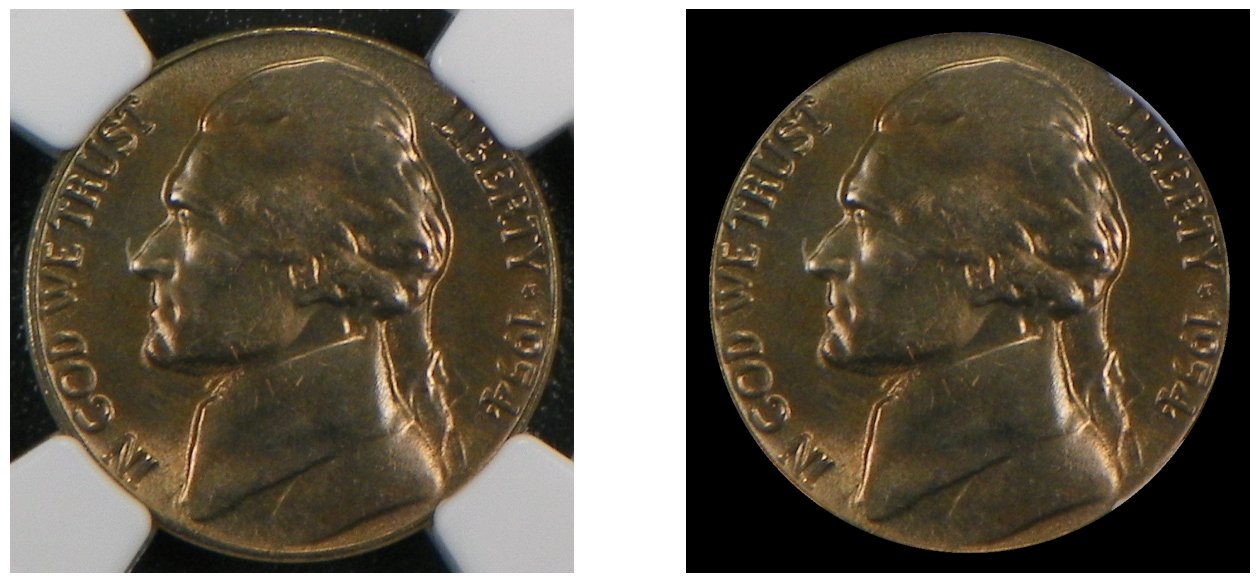

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8))
ax1.imshow(img)
ax1.axis('off')

ax2.imshow(cropped)
ax2.axis('off');

/media/razydave/01DA189A333B1070/conda_envs/num_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/media/razydave/01DA189A333B1070/conda_envs/num_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/media/razydave/01DA189A333B1070/conda_envs/num_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/media/razydave/01DA189A333B1070/conda_envs/num_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='pixel', ylabel='Density'>

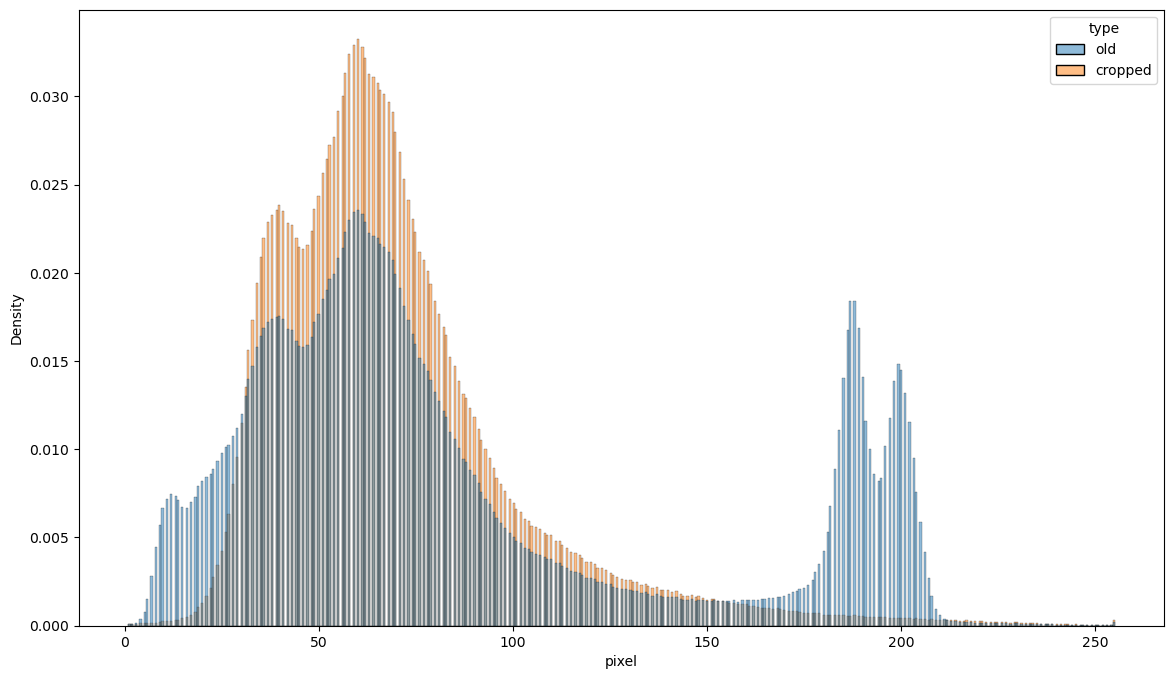

In [16]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.histplot(data = temp_df, x = 'pixel', hue = 'type', 
             stat = "density", 
             common_norm = False, bins = 'auto', ax = ax)

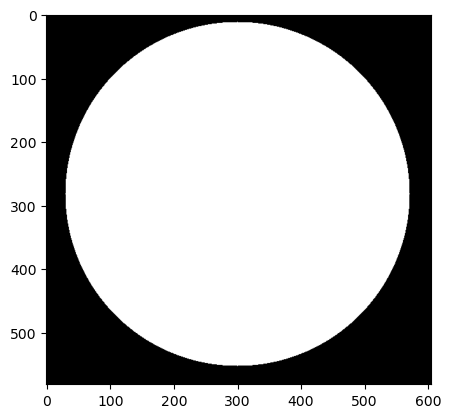

In [17]:
quad_img = Image.open(quarters_files[100])
quad_img = np.asarray(quad_img)

quad_gray_img = cv2.cvtColor(quad_img, cv2.COLOR_BGR2GRAY)
quad_blurred = cv2.GaussianBlur(quad_gray_img, (15, 15), 0)

quad_circles = cv2.HoughCircles(
    quad_blurred,
    cv2.HOUGH_GRADIENT,
    dp = 1,
    minDist = 50,
    param1 = 50,
    param2 = 30,
    minRadius = 20
)

quad_circles = np.round(quad_circles[0, :]).astype("int")
quad_valid_circles = [circle for circle in quad_circles if circle[2] > 30]
quad_best_circle = max(quad_valid_circles, key=lambda x: x[2])


x, y, r = quad_best_circle
quad_mask = np.zeros_like(quad_img, dtype = 'uint8')
cv2.circle(quad_mask, (x, y), r, (255, 255, 255), -1)
quad_mask_1 = quad_mask[:, :, 0]
plt.imshow(quad_mask, cmap = 'gray')

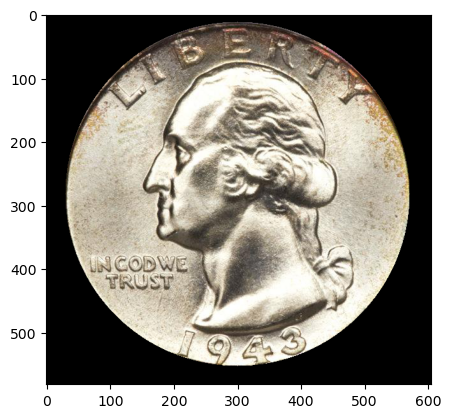

In [18]:
quad_cropped = cv2.bitwise_and(quad_img, quad_img, mask = quad_mask_1)
plt.imshow(quad_cropped)

In [19]:
quad_img_len = len(quad_img.flatten())
quad_cropped_len = len(quad_cropped.flatten())
quad_img_dist = pd.DataFrame(
    {
        "pixel": quad_img.flatten().tolist() + quad_cropped.flatten().tolist(),
        "type": ["old"]*quad_img_len + ["cropped"]*quad_cropped_len
    }
)
print(quad_img_dist.shape)
print(quad_img_dist.isin([np.inf, -np.inf]).sum())

(2105544, 2)
pixel    0
type     0
dtype: int64


In [20]:
print(quad_img_dist[quad_img_dist['pixel'] != 0].shape)
quad_temp_df = quad_img_dist[(quad_img_dist['pixel'] != 0) & (quad_img_dist['pixel'] != 255)].copy()

(1739682, 2)


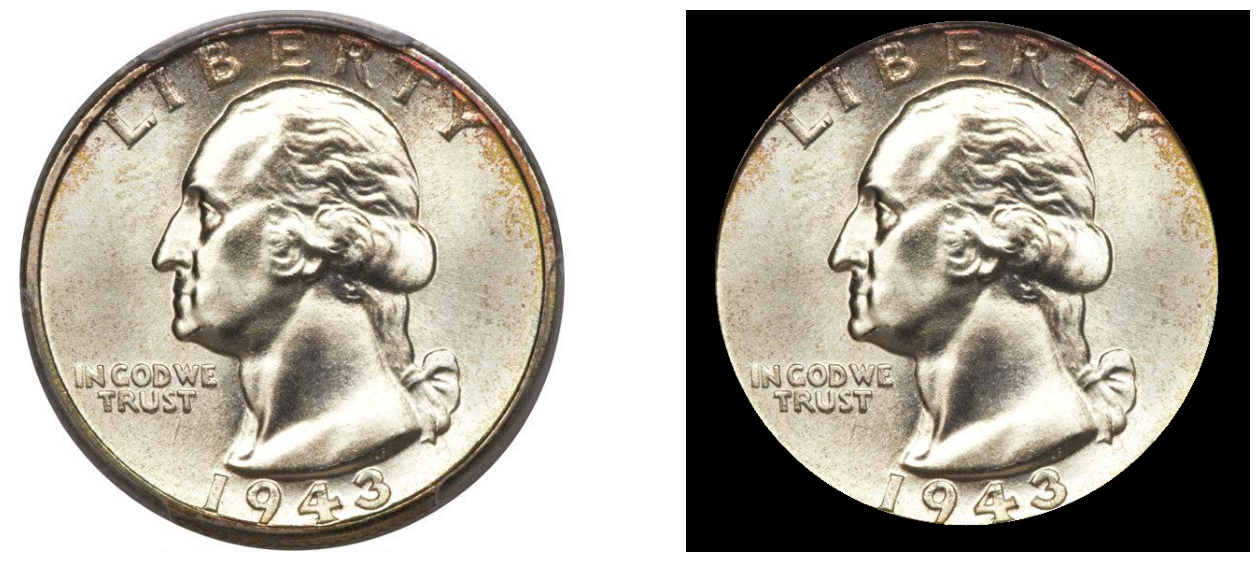

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8))
ax1.imshow(quad_img)
ax1.axis('off')

ax2.imshow(quad_cropped)
ax2.axis('off');

/media/razydave/01DA189A333B1070/conda_envs/num_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/media/razydave/01DA189A333B1070/conda_envs/num_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/media/razydave/01DA189A333B1070/conda_envs/num_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/media/razydave/01DA189A333B1070/conda_envs/num_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='pixel', ylabel='Density'>

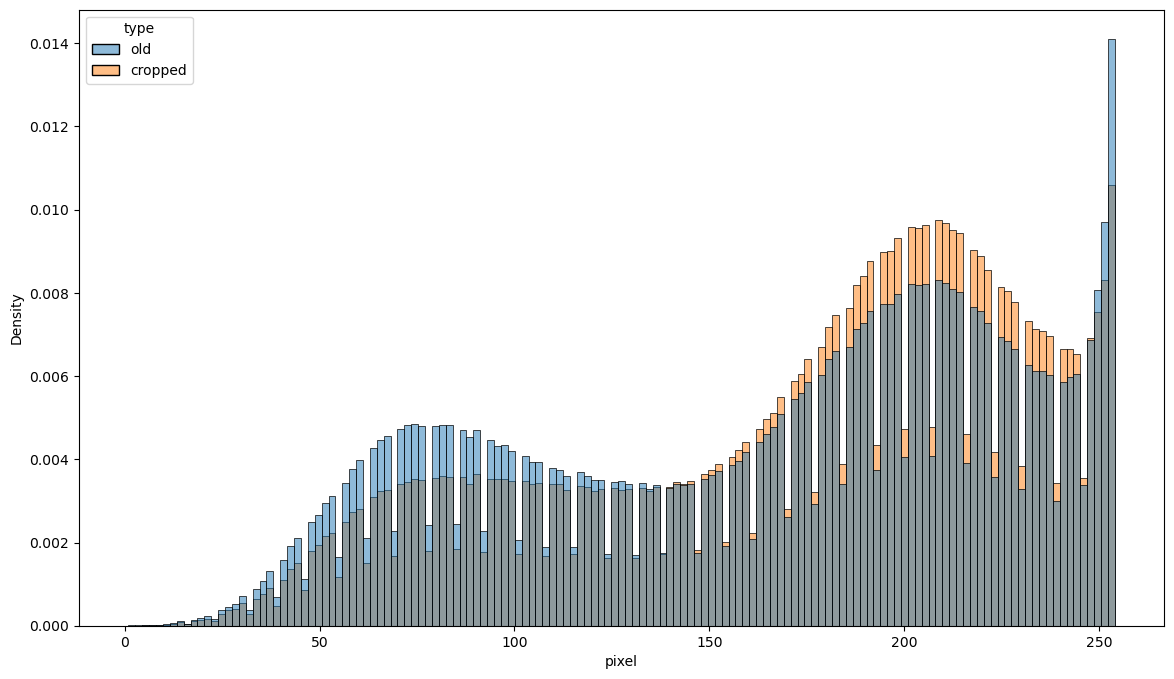

In [22]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.histplot(data = quad_temp_df, x = 'pixel', hue = 'type', 
             stat = "density", 
             common_norm = False, bins = 'auto', ax = ax)